Write code that, given a set of data, calculates the best interpolating polynomial of degree N (apply to different N values). Then repeat the experiment using different data sets.

Repeat the process, but now, considering Ridge Regression (explore different values of alpha).

Plot the errors in the training set and test set as done in class.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def generate_noisy_data(analytical_function, x_values, noise_level):
    analytical_y_values = analytical_function(x_values)
    noise = np.random.normal(0, noise_level, size=len(x_values))
    return analytical_y_values + noise

def polynomial_regression(x_values, y_values, degree, alpha=None):
    if alpha:
        model = Ridge(alpha=alpha, fit_intercept=False)
        x_poly = np.vander(x_values, degree + 1)
        model.fit(x_poly, y_values)
        return model.coef_
    else:
        coefficients = np.polyfit(x_values, y_values, degree)
        return coefficients

def plot_polynomial_fit(x_values, y_values, coefficients, true_function=None):
    fitted_polynomial = np.poly1d(coefficients)
    x_fit = np.linspace(min(x_values), max(x_values), 1000)
    y_fit = fitted_polynomial(x_fit)

    plt.figure(figsize=(12, 6))
    plt.scatter(x_values, y_values, label='Noisy Data', color='blue')
    plt.plot(x_fit, y_fit, label='Polynomial Fit', color='red')

    if true_function:
        y_true = true_function(x_fit)
        plt.plot(x_fit, y_true, label='True Function', color='green')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

def evaluate_model(x_values, y_values, degree, alpha=None):
    x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=42)

    if alpha:
        coeffs = polynomial_regression(x_train, y_train, degree, alpha)

        X_train_poly = np.vander(x_train, degree + 1)
        X_test_poly = np.vander(x_test, degree + 1)

        y_hat_train = np.dot(X_train_poly, coeffs)
        y_hat_test = np.dot(X_test_poly, coeffs)

        train_set_mse = mean_squared_error(y_train, y_hat_train)
        test_set_mse = mean_squared_error(y_test, y_hat_test)
        return train_set_mse, test_set_mse

    else:
        coeffs = np.polyfit(x_train, y_train, degree)

        y_hat_train = np.polyval(coeffs, x_train)
        y_hat_test = np.polyval(coeffs, x_test)

        train_set_mse = mean_squared_error(y_train, y_hat_train)
        test_set_mse = mean_squared_error(y_test, y_hat_test)
        return train_set_mse, test_set_mse

def mse(x_values, y_values, max_degree, alphas=None):
    if alphas:
        scaler = StandardScaler()
        x_values_scaled = scaler.fit_transform(x_values.reshape(-1, 1))
        x_values_flattened = x_values_scaled.ravel()

        train_mse = np.zeros((len(alphas), max_degree))
        test_mse = np.zeros((len(alphas), max_degree))
        degrees = range(max_degree)

        for i, alpha in enumerate(alphas):
            for degree in degrees:
                mse = evaluate_model(x_values_flattened, y_values, degree, alpha)
                train_mse[i, degree] = mse[0]
                test_mse[i, degree] = mse[1]

        plt.figure(figsize=(12, 6))
        for i, alpha in enumerate(alphas):
            plt.subplot(1, len(alphas), i + 1)
            plt.scatter(degrees, train_mse[i, :], label='Training', edgecolors='blue', facecolors='none')
            plt.plot(degrees, train_mse[i, :], linestyle='-', color='blue')
            plt.scatter(degrees, test_mse[i, :], label='Test', edgecolors='red', facecolors='none')
            plt.plot(degrees, test_mse[i, :], linestyle='-', color='red')
            plt.title(f'MSE values (alpha={alpha})')
            plt.xlabel('degree')
            plt.ylabel('error')
            plt.legend()
        plt.tight_layout()

        best_alpha_idx, best_degree = np.unravel_index(np.argmin(test_mse), test_mse.shape)
        best_alpha = alphas[best_alpha_idx]
        return best_alpha, best_degree

    else:
        train_mse = np.zeros(max_degree)
        test_mse = np.zeros(max_degree)
        degrees = range(max_degree)

        for i, degree in enumerate(degrees):
            mse = evaluate_model(x_values, y_values, degree)
            train_mse[i] = mse[0]
            test_mse[i] = mse[1]

        plt.figure(figsize=(12, 6))
        plt.scatter(degrees, train_mse, label='Training', edgecolors='blue', facecolors='none')
        plt.plot(degrees, train_mse, linestyle='-', color='blue')
        plt.scatter(degrees, test_mse, label='Test', edgecolors='red', facecolors='none')
        plt.plot(degrees, test_mse, linestyle='-', color='red')
        plt.title('MSE values')
        plt.xlabel('degree')
        plt.ylabel('error')
        plt.legend()

        best_degree = np.argmin(test_mse)
        return best_degree

def plot_mse_vs_alpha_fixed_degree(x_values, y_values_noisy, fixed_degree, alpha_range):
    train_mse = np.zeros(len(alpha_range))
    test_mse = np.zeros(len(alpha_range))

    for i, alpha in enumerate(alpha_range):
        mse = evaluate_model(x_values, y_values_noisy, fixed_degree, alpha)
        train_mse[i] = mse[0]
        test_mse[i] = mse[1]

    plt.figure(figsize=(12, 6))
    plt.plot(alpha_range, train_mse, label='Training')
    plt.plot(alpha_range, test_mse, label='Test')
    plt.title(f'MSE vs Alpha in log scale // Polynomial Degree: {fixed_degree}')
    plt.xlabel('alpha')
    plt.ylabel('MSE')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

# Example 1: sin(x)

Function and parameters

In [ ]:
def analytical_function(x):
    return np.sin(x)

num_pts = 100
x_values = np.linspace(0, 2*np.pi, num_pts)
y_values_noisy = generate_noisy_data(analytical_function, x_values, noise_level=0.25) # each running give different points

MSE values

<ipython-input-76-22e994041d7d>:105: RankWarning: Polyfit may be poorly conditioned
  mse = evaluate_model(x_values, y_values, degree)


Best degree: 7


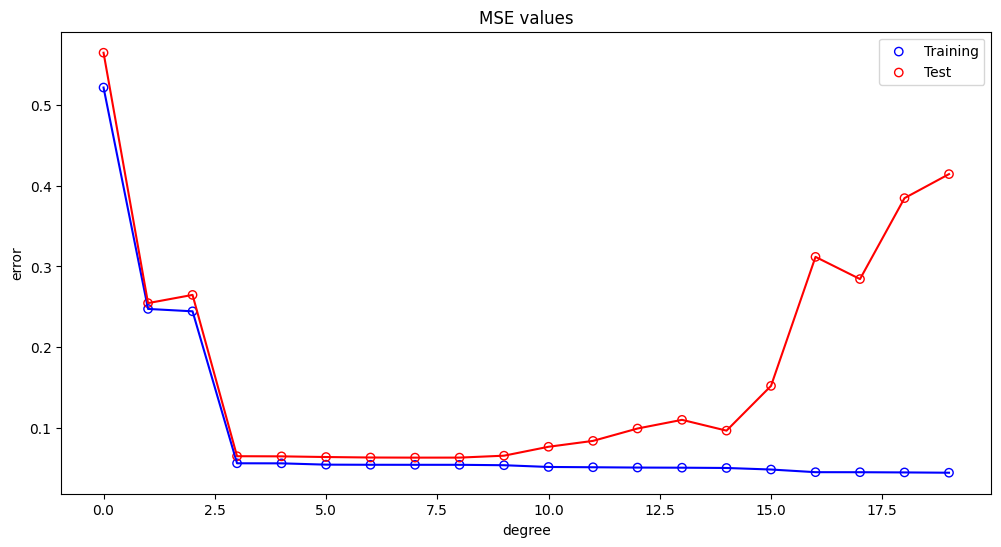

In [ ]:
max_degree = 20
best_degree = mse(x_values, y_values_noisy, max_degree)
print(f'Best degree: {best_degree}') # index of min value of the test_mse list

Polynomial plot using best degree found

Best degree: 7


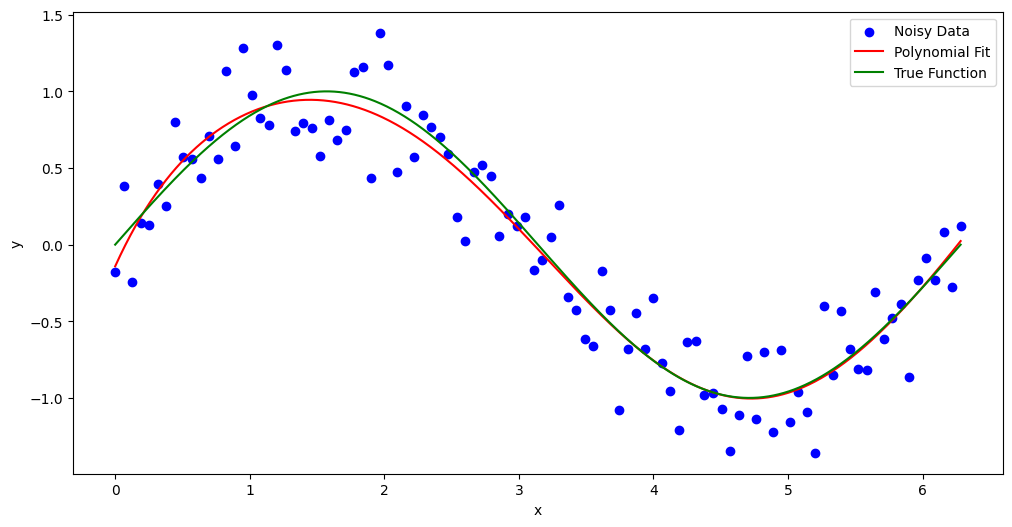

In [ ]:
print(f'Best degree: {best_degree}')
best_coeffs = polynomial_regression(x_values, y_values_noisy, best_degree)
plot_polynomial_fit(x_values, y_values_noisy, best_coeffs, analytical_function)

Analyzing behavior of MSE for different alphas (lambdas)

Best alpha: 0.001 // Best degree: 7


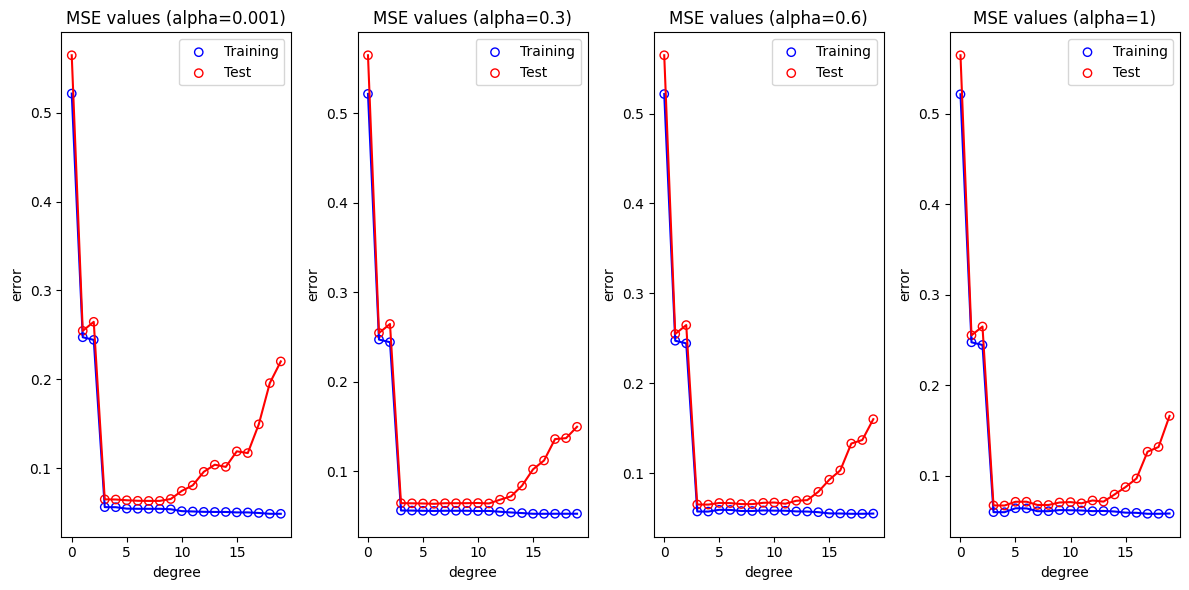

In [ ]:
best_alpha, best_degree = mse(x_values, y_values_noisy, max_degree, alphas=[0.001,0.3,0.6,1])
print(f'Best alpha: {best_alpha} // Best degree: {best_degree}')

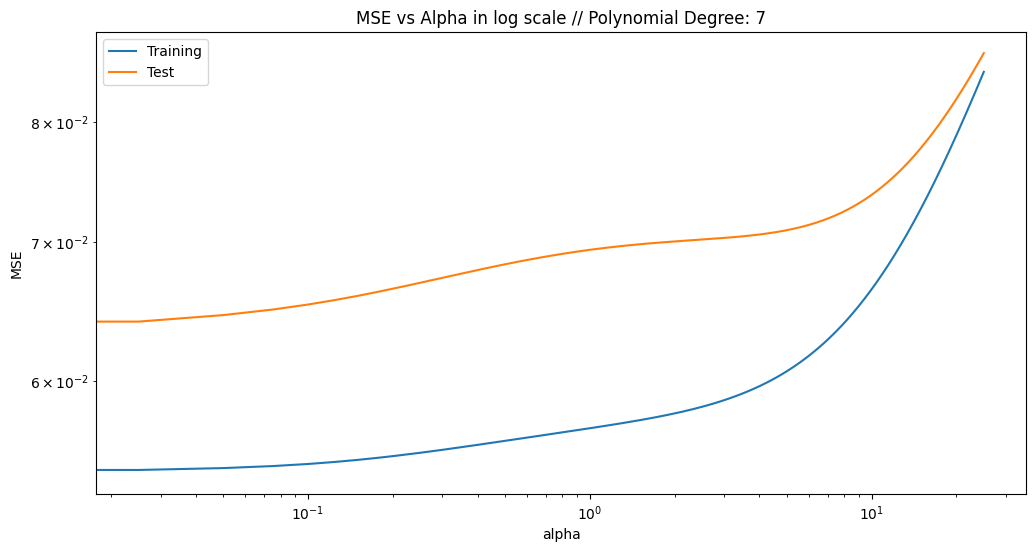

In [ ]:
alpha_range = np.linspace(0, 25, 1000) # used alpha between 0 and 25 to visualize better the behavior
plot_mse_vs_alpha_fixed_degree(x_values, y_values_noisy, best_degree, alpha_range)

Polynomial plot using best alpha/degree found

Best alpha: 0.001 // Best degree: 7


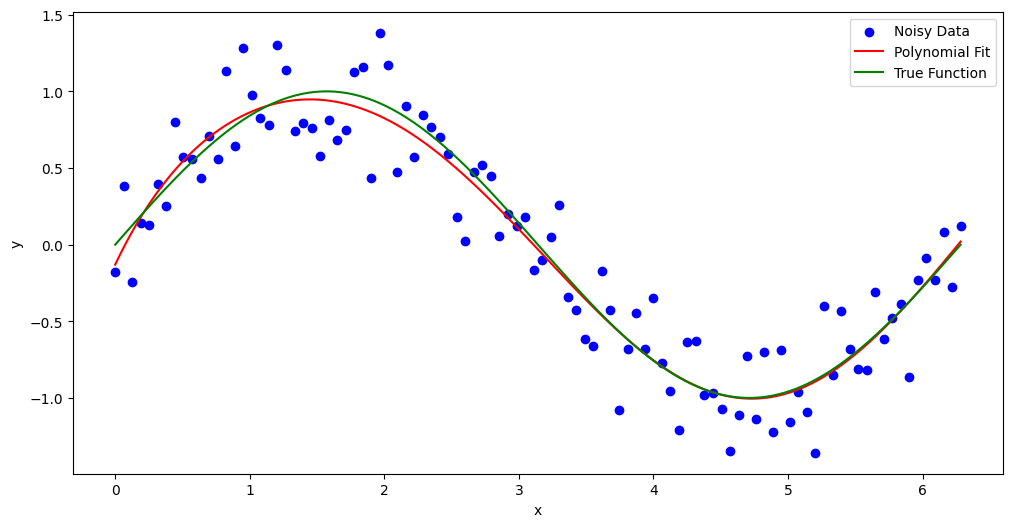

In [ ]:
print(f'Best alpha: {best_alpha} // Best degree: {best_degree}')
best_coeffs = polynomial_regression(x_values, y_values_noisy, best_degree, best_alpha)
plot_polynomial_fit(x_values, y_values_noisy, best_coeffs, analytical_function)

# Example 2: cos(x)

Function and parameters

In [ ]:
def analytical_function(x):
    return np.cos(x)

num_pts = 100
x_values = np.linspace(0, 2*np.pi, num_pts)
y_values_noisy = generate_noisy_data(analytical_function, x_values, noise_level=0.25) # each running give different points

MSE values

<ipython-input-143-e0efdbb8d987>:105: RankWarning: Polyfit may be poorly conditioned
  mse = evaluate_model(x_values, y_values, degree)


Best degree: 4


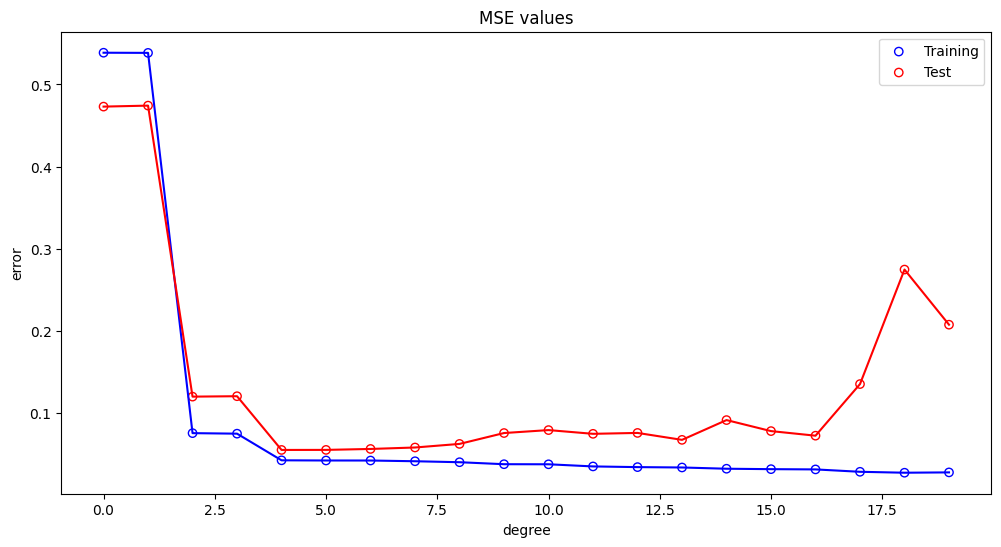

In [ ]:
max_degree = 20
best_degree = mse(x_values, y_values_noisy, max_degree)
print(f'Best degree: {best_degree}') # index of min value of the test_mse list

Polynomial plot using best degree found

Best degree: 4


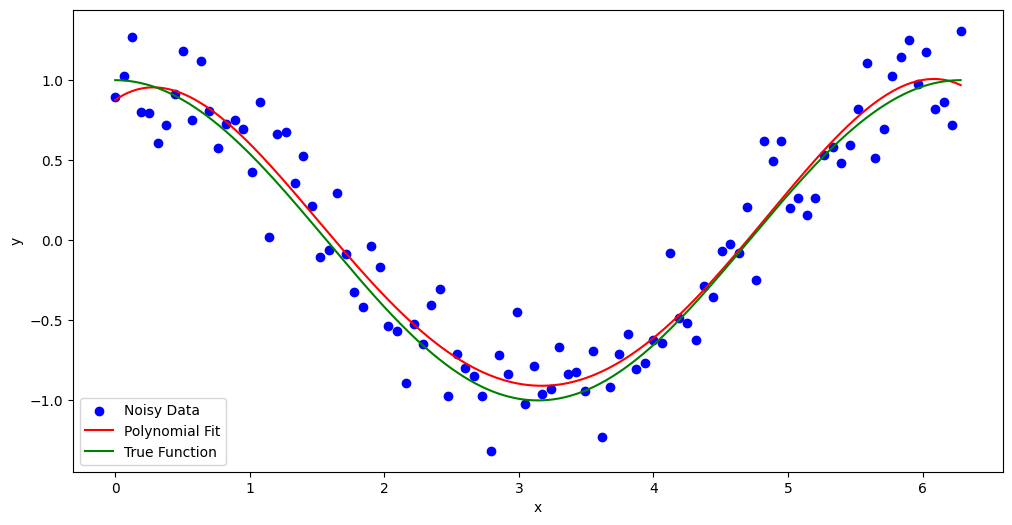

In [ ]:
print(f'Best degree: {best_degree}')
best_coeffs = polynomial_regression(x_values, y_values_noisy, best_degree)
plot_polynomial_fit(x_values, y_values_noisy, best_coeffs, analytical_function)

Analyzing behavior of MSE for different alphas (lambdas)

Best alpha: 0.001 // Best degree: 4


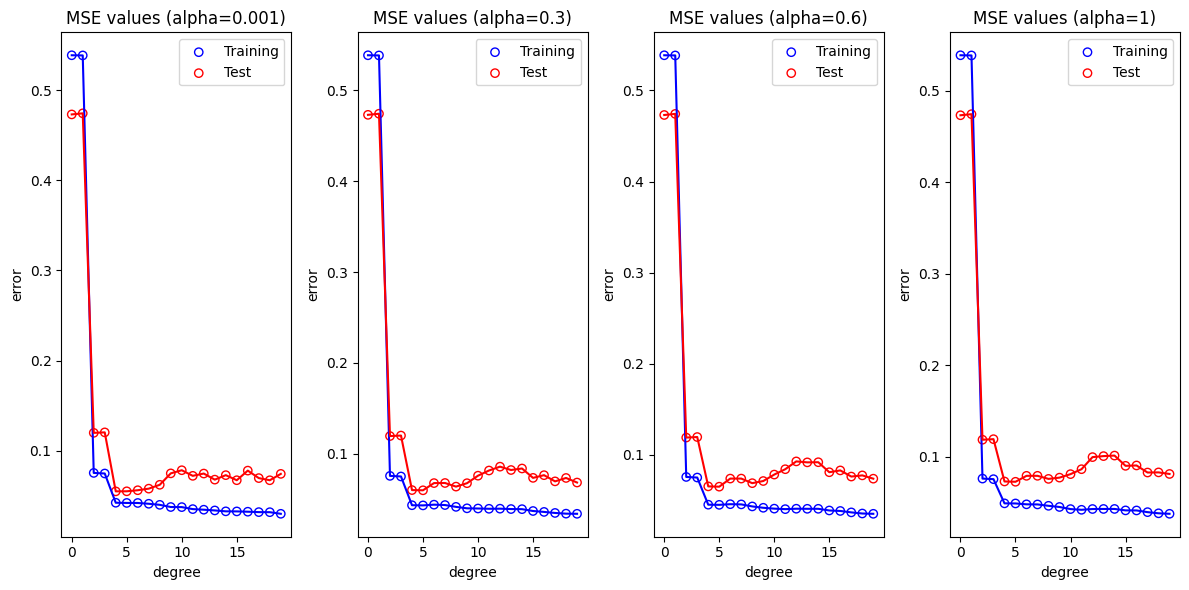

In [ ]:
best_alpha, best_degree = mse(x_values, y_values_noisy, max_degree, alphas=[0.001,0.3,0.6,1])
print(f'Best alpha: {best_alpha} // Best degree: {best_degree}')

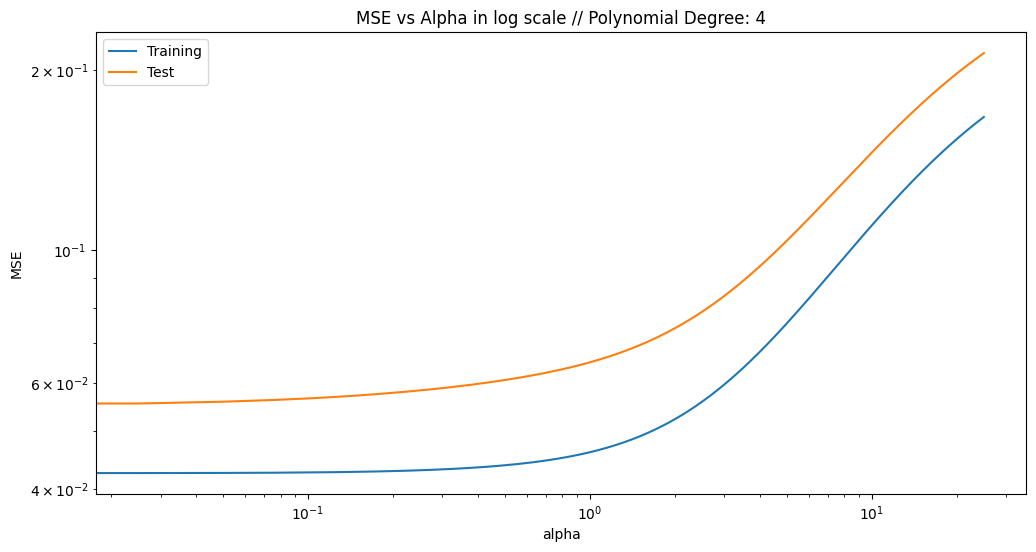

In [ ]:
alpha_range = np.linspace(0, 25, 1000) # used alpha between 0 and 25 to visualize better the behavior
plot_mse_vs_alpha_fixed_degree(x_values, y_values_noisy, best_degree, alpha_range)

Polynomial plot using best alpha/degree found

Best alpha: 0.001 // Best degree: 4


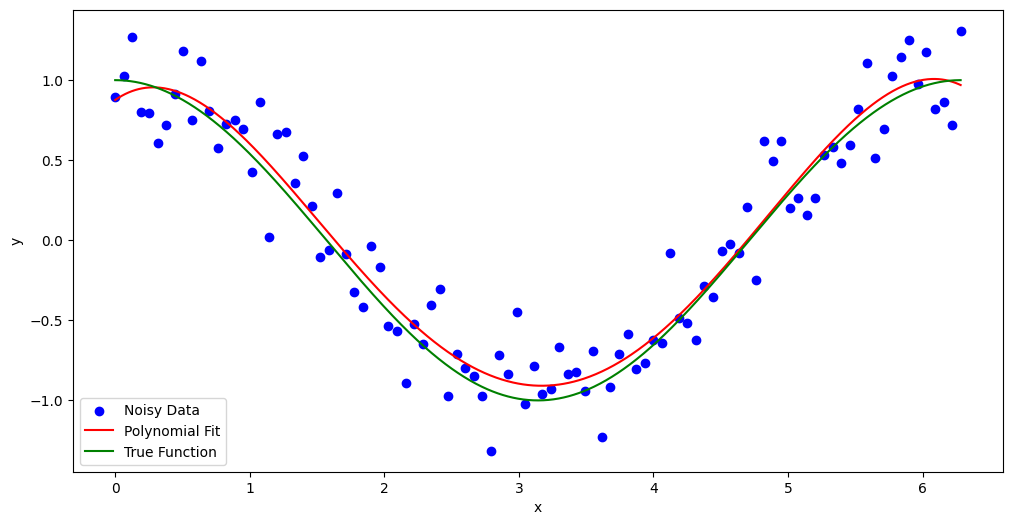

In [ ]:
print(f'Best alpha: {best_alpha} // Best degree: {best_degree}')
best_coeffs = polynomial_regression(x_values, y_values_noisy, best_degree, best_alpha)
plot_polynomial_fit(x_values, y_values_noisy, best_coeffs, analytical_function)

# Example 3: tanh(x) - the example with strangest behavior

Function and parameters

In [ ]:
def analytical_function(x):
    return np.tanh(x)

num_pts = 100
x_values = np.linspace(0, 2*np.pi, num_pts)
y_values_noisy = generate_noisy_data(analytical_function, x_values, noise_level=0.15) # each running give different points

MSE values

<ipython-input-143-e0efdbb8d987>:105: RankWarning: Polyfit may be poorly conditioned
  mse = evaluate_model(x_values, y_values, degree)


Best degree: 3


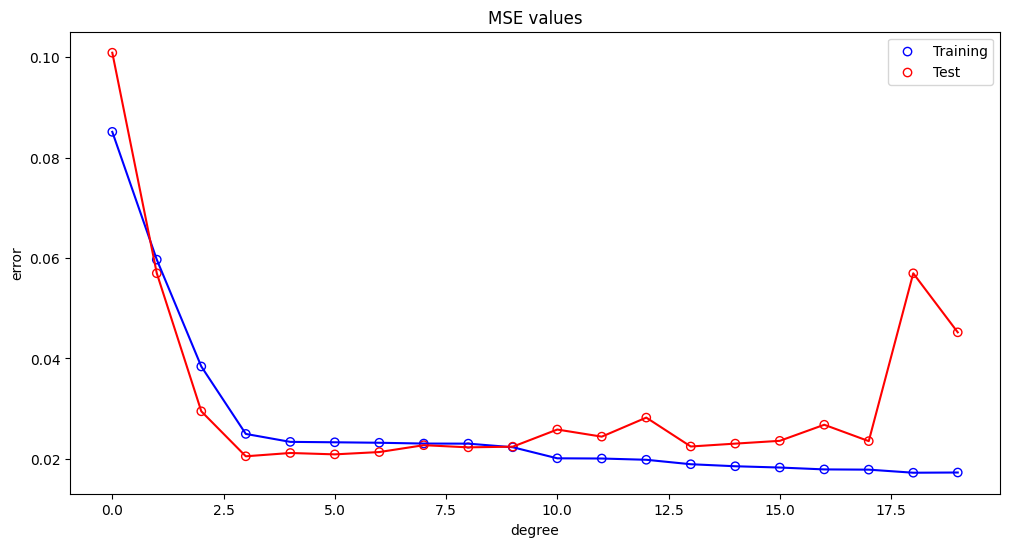

In [ ]:
max_degree = 20
best_degree = mse(x_values, y_values_noisy, max_degree)
print(f'Best degree: {best_degree}') # index of min value of the test_mse list

Polynomial plot using best degree found

Best degree: 3


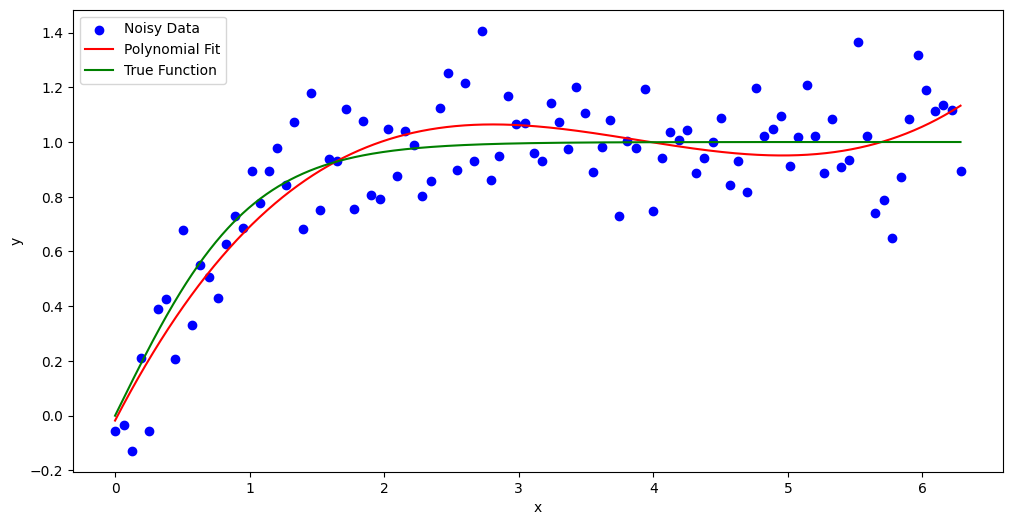

In [ ]:
print(f'Best degree: {best_degree}')
best_coeffs = polynomial_regression(x_values, y_values_noisy, best_degree)
plot_polynomial_fit(x_values, y_values_noisy, best_coeffs, analytical_function)

Analyzing behavior of MSE for different alphas (lambdas)

Best alpha: 1 // Best degree: 3


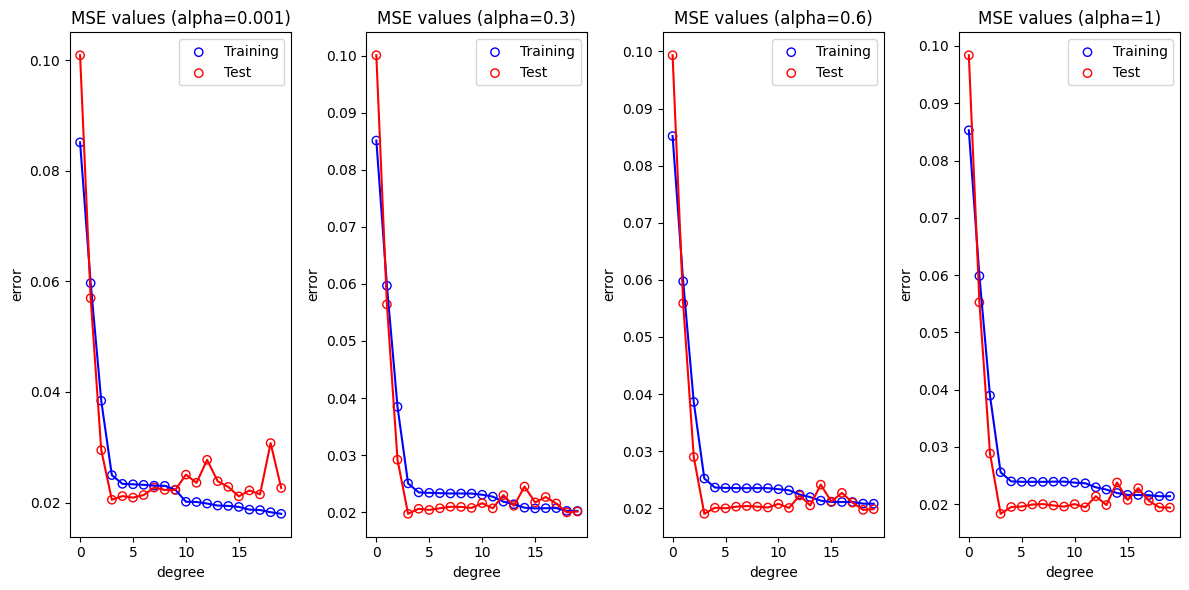

In [ ]:
best_alpha, best_degree = mse(x_values, y_values_noisy, max_degree, alphas=[0.001,0.3,0.6,1])
print(f'Best alpha: {best_alpha} // Best degree: {best_degree}')

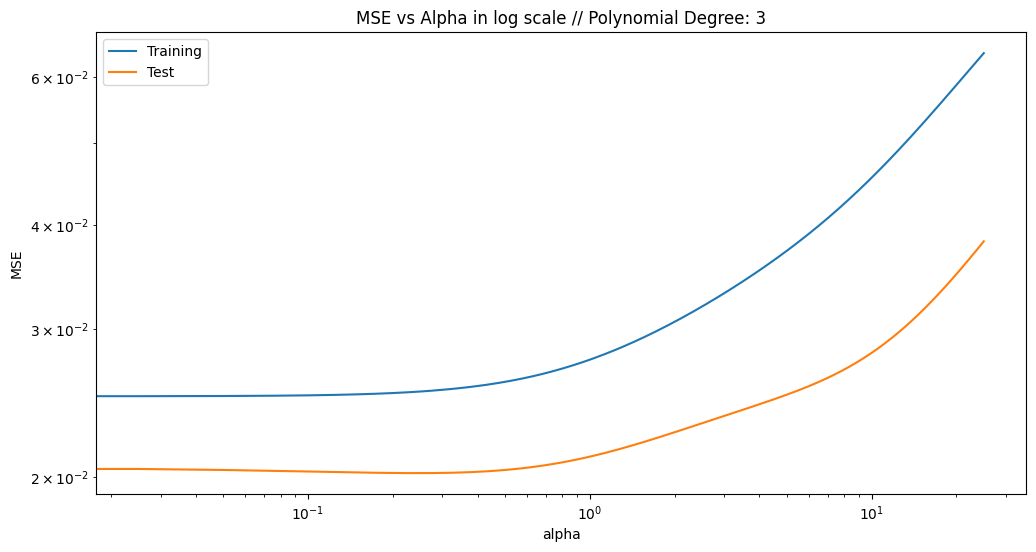

In [ ]:
alpha_range = np.linspace(0, 25, 1000) # used alpha between 0 and 25 to visualize better the behavior
plot_mse_vs_alpha_fixed_degree(x_values, y_values_noisy, best_degree, alpha_range)

Polynomial plot using best alpha/degree found

Best alpha: 1 // Best degree: 3


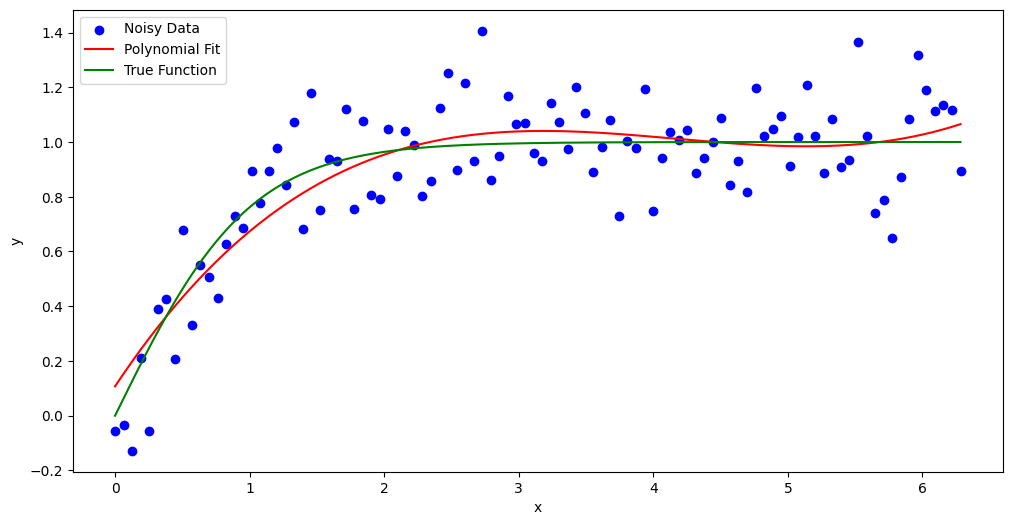

In [ ]:
print(f'Best alpha: {best_alpha} // Best degree: {best_degree}')
best_coeffs = polynomial_regression(x_values, y_values_noisy, best_degree, best_alpha)
plot_polynomial_fit(x_values, y_values_noisy, best_coeffs, analytical_function)